**Credit Card Fraud Detection**

**Kaggle DataSet**

[Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**EDA(Exploratory Data Analysis)**

Detect And Handle Outliers

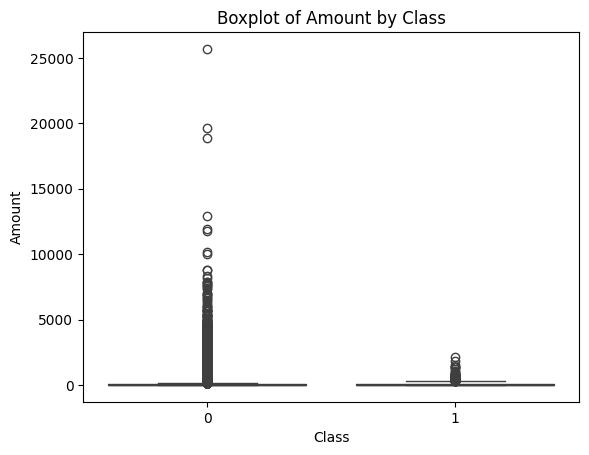

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

Before Handling Outliers

The boxplot shows significant outliers, particularly for the "Class 0" (non-fraud) transactions, with amounts going as high as ~25,000.

The distribution for "Class 1" (fraud) transactions has fewer extreme values and a much narrower range.

These extreme values could skew model performance, especially for models sensitive to scale.

In [ ]:
#Using IQR to identify outliers
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))]
print(outliers)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28,0
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


In [ ]:
#To Handle outliers
#check skewness
#if skweness is greater than 1 or less than -1, the data is highly skewed
#If skewness is between -1 and -0.5 or between 0.5 and 1, the data is moderately skewed
#If skewness is between -0.5 and 0.5, the data is approximately symmetric
#skewness = 0 means data is perfectly symmetric

#if data is skewed, we can replace outliers with median else with mean
if df['Amount'].skew() > 1 or df['Amount'].skew() < -1:
    df.loc[(df['Amount'] > (Q3 + 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR)), 'Amount'] = df['Amount'].median()

else:
    df.loc[(df['Amount'] > (Q3 + 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR)), 'Amount'] = df['Amount'].mean()

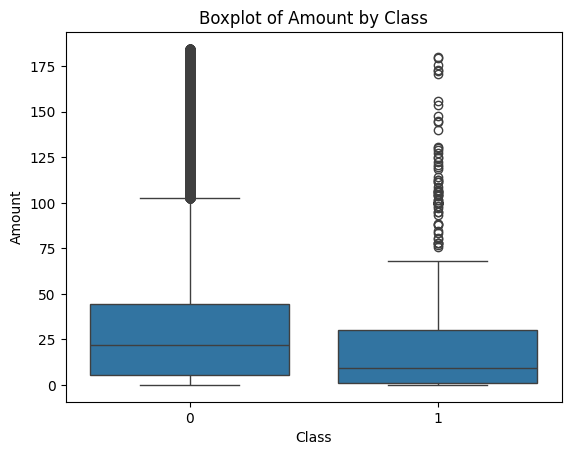

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

After Handling Outliers

Outliers for "Class 0" have been capped or replaced, with the maximum amount now appearing to be below 200.

The distribution is more uniform and scaled appropriately, improving data quality for modeling.

For "Class 1," some high-value outliers remain, but the overall range has narrowed.

**Visualization**

1) Visualisation to show the class distribution

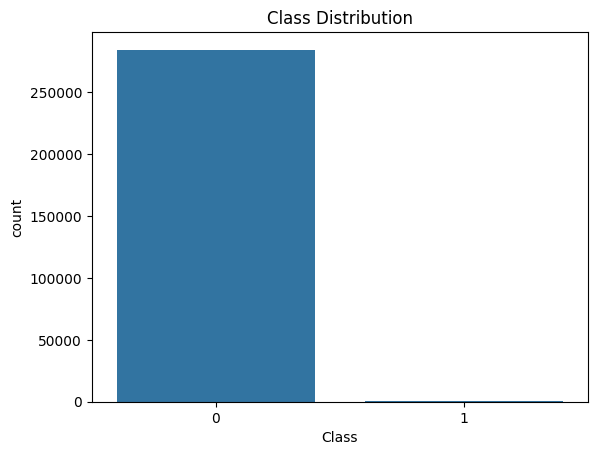

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

From the visualisations its evident #From the visualisations its evident that Fraud classes are very few compared to non-fraud classes

2) Correlation Analysis

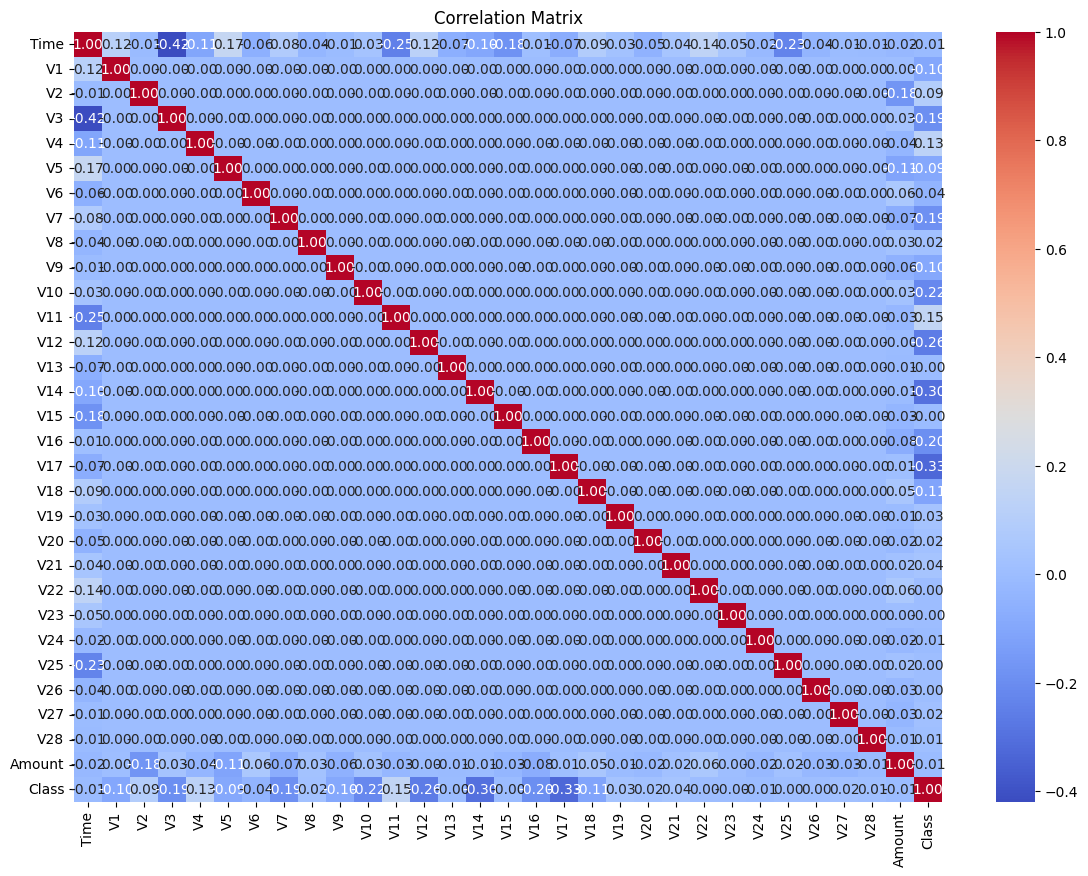

In [ ]:
correlation = df.corr()
plt.figure(figsize=(14, 10))
#annot=True to print the values inside the square
#To avoid overlapping of the values, we can use the fmt parameter to format the values
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix,

Amount and V2 are negatively correlated.

Amount, V7, V20 are positively correlated.

3) Transaction Amount Analysis

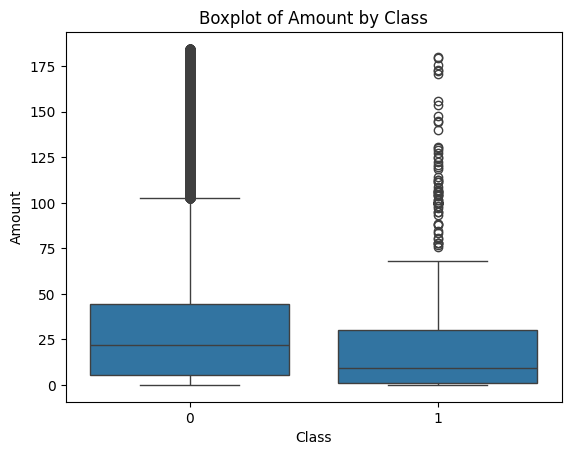

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

Non-fraudulent transactions (class 0) have a higher median transaction amount than fraudulent transactions (class 1).

This indicates that typical non-fraudulent transactions involve larger amounts compared to fraudulent ones.

Non-fraudulent transactions show a wider interquartile range (IQR), suggesting greater variability in the transaction amounts compared to fraudulent transactions.

Fraudulent transactions are more tightly clustered in terms of amounts, possibly indicating consistency in how fraudsters choose transaction values.

4. Time vs. Fraud

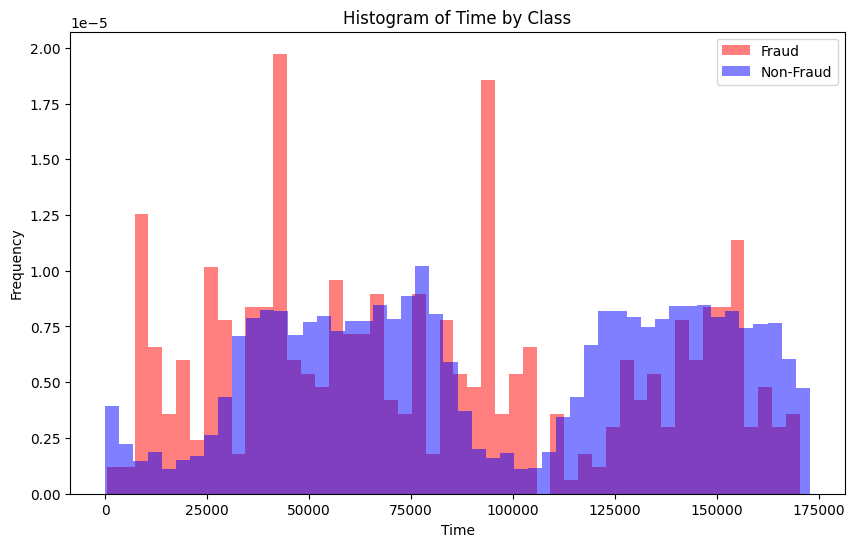

In [ ]:
#Histogram of time for fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
fraud = df[df['Class'] == 1]
non_fraud  = df[df['Class'] == 0]
plt.hist(fraud['Time'], bins=50, alpha=0.5, label='Fraud', color='r',density=True)
plt.hist(non_fraud['Time'], bins=50, alpha=0.5, label='Non-Fraud', color='b',density=True)
plt.title('Histogram of Time by Class')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram shows the distribution of fraudulent and non-fraudulent transactions over time. Fraudulent transactions (red) occur sporadically but are concentrated at specific intervals, while non-fraudulent transactions (blue) are more evenly distributed across the timeline. This suggests that fraud might be tied to particular time periods or events.

Exploratory Data Analysis

Conducted detailed exploratory data analysis (EDA) on a credit card transactions dataset, identifying trends and anomalies.

Discovered significant correlations between specific features and fraud cases using heatmaps and boxplots.

Identified and addressed class imbalance (fraud to non-fraud ratio ~1:1000).

Highlighted key insights, such as higher fraud incidence in small transaction amounts.

**Data Preprocessing**

Missing Values

In [ ]:
#To check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Scaling Features

In [ ]:
#To scale the data so that data is in the same range
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']
X_scaled = StandardScaler().fit_transform(X)

Splitting Data into Training and testing Datasets

In [ ]:
#split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

Balancing Dataset using SMOTE Technique

In [ ]:
#Dataset is highly imbalanced with class 0(Non-Fraud) being the majority class
#To balance the dataset, used SMOTE(synthetic minority over-sampling technique)
#SMOTE is an over-sampling technique that generates synthetic samples from the minority class to balance the dataset
#Random state for reproducibility
smote = SMOTE(random_state=42)
X_train_balanced , y_train_balanced =smote.fit_resample(X_train, y_train)

**Model Training**

Random Forest Classifier :

supervised machine learning algorithm that combines multiple decision trees to create a more robust and accurate classification model. It is part of the ensemble learning family and is known for its ability to handle both numerical and categorical data, reduce overfitting, and provide feature importance insights.

This model is considered because it uses multiple decision trees with random subsets of data and features, reduces overfitting, making it a robust choice.

In [ ]:
#Random state for reproducibility
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = model.predict(X_test)
print("classification report :\n",classification_report(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred),2)

classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.81      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix :
 [[85284    12]
 [   28   119]]
Accuracy: 1.0
AUC: 0.9


Final Conclusion

The model has an accuracy of 0.99 and an AUC of 0.91 indicating that the model is performing well.